In [1]:
from orientations import *

In [2]:
import sage.graphs.graph_plot
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = [6, 6]

from sage.plot.colors import black, red, blue, green, cyan

cols = {0: black, 1: red, 2: blue, 3: green, 4: cyan}

def opts(g=None):
    return {
        'layout': 'circular', 
        'vertex_labels': True, 
        'vertex_colors': 'white', 
        'vertex_size': 200,
        'edge_colors': g._color_by_label(cols) if g is not None else None,
        # 'edge_labels': True,
    }

show = True

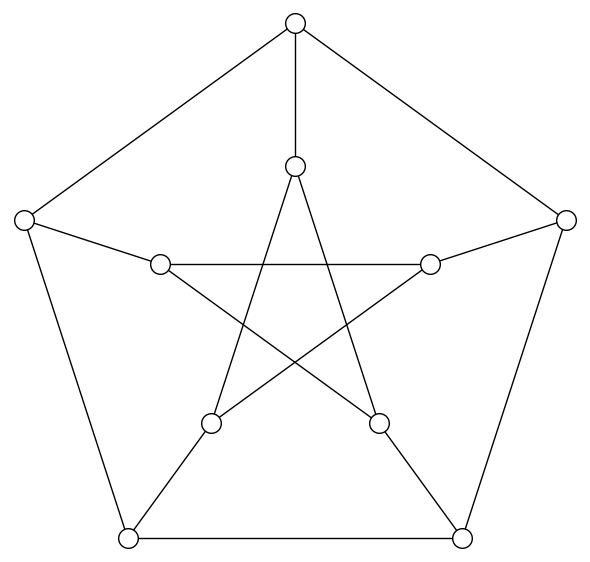

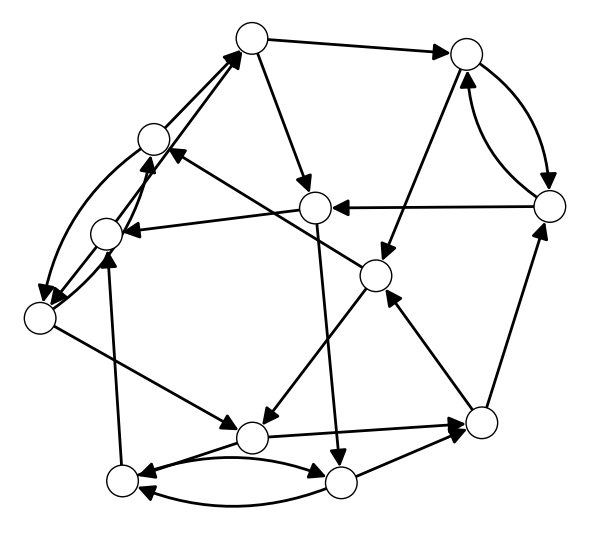

In [3]:
g = graphs.PetersenGraph()
o = opts(g)

o['layout'] = None
o['vertex_labels'] = False

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/1_1.png')

d = digraphs.Kautz(2, 3)
o = opts(d)
o['layout'] = None
o['vertex_labels'] = False
del o['edge_colors']

if show:
    d.show(**o)
d.plot(**o).save('../presentation/img/1_2.png')

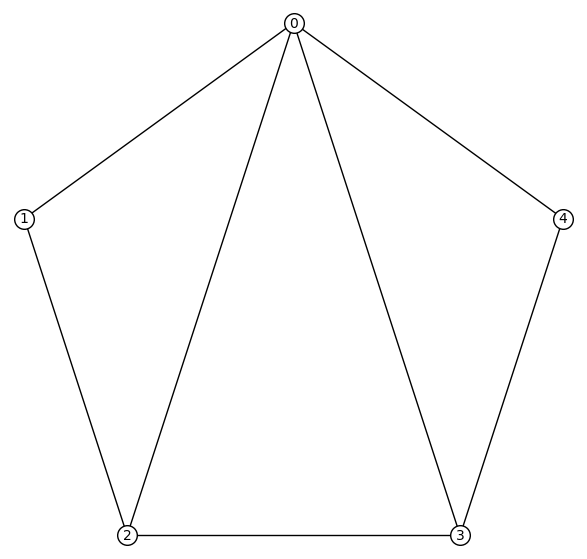

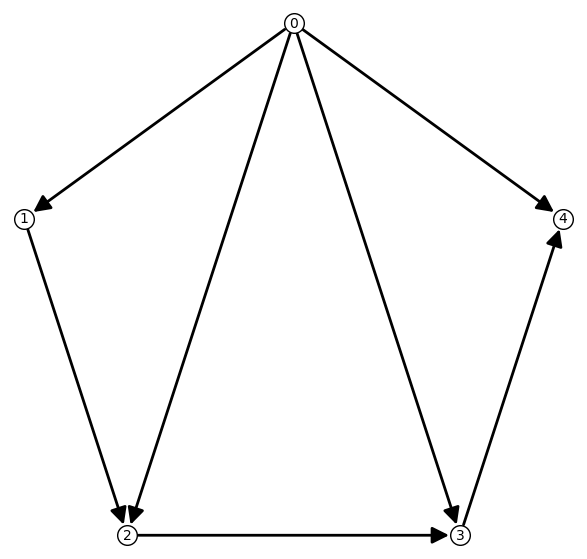

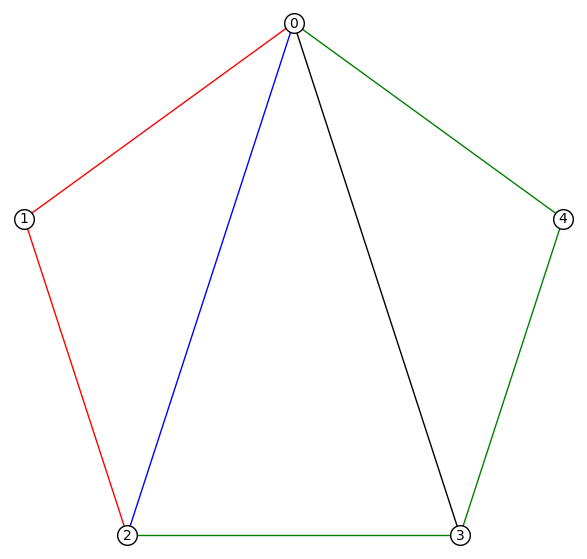

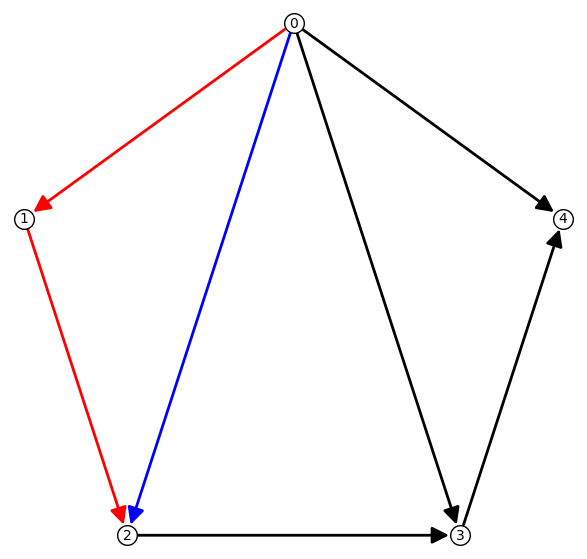

In [4]:
g = Graph()

g.add_vertices([i for i in range(5)])

g.add_edges([(0, 1), (0, 2), (0, 3), (0, 4)])
g.add_edges([(1, 2), (2, 3), (3, 4)])

o = opts(g)
if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/2_1.png')

d = list(g.orientations())[0]
o = opts(d)
if show:
    d.show(**o)
d.plot(**o).save('../presentation/img/2_2.png')

for i, d in enumerate(list(g.orientations())[1:3]):
    d.plot(**opts(d)).save(f'../presentation/img/2_{3+1}.png')

g.set_edge_label(0, 1, 1)
g.set_edge_label(1, 2, 1)

g.set_edge_label(0, 2, 2)

g.set_edge_label(0, 4, 3)
g.set_edge_label(4, 3, 3)
g.set_edge_label(3, 2, 3)

o = opts(g)
if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/3_1.png')

d = list(g.orientations())[0]

d.set_edge_label(0, 4, None)
d.set_edge_label(3, 4, None)
d.set_edge_label(2, 3, None)
o = opts(d)

if show:
    d.show(**o)
d.plot(**o).save('../presentation/img/3_2.png')

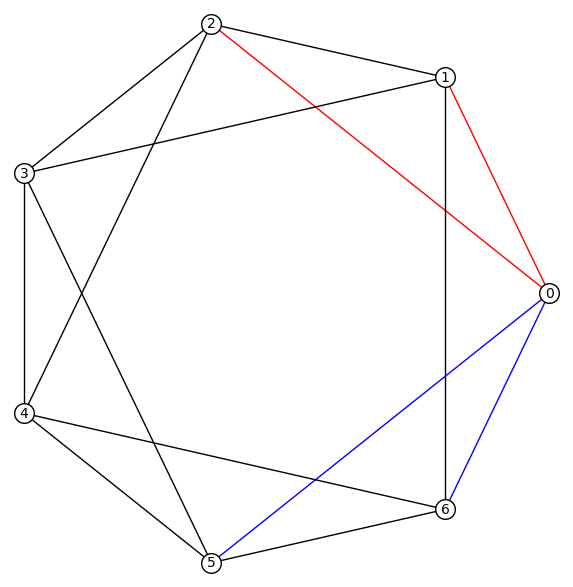

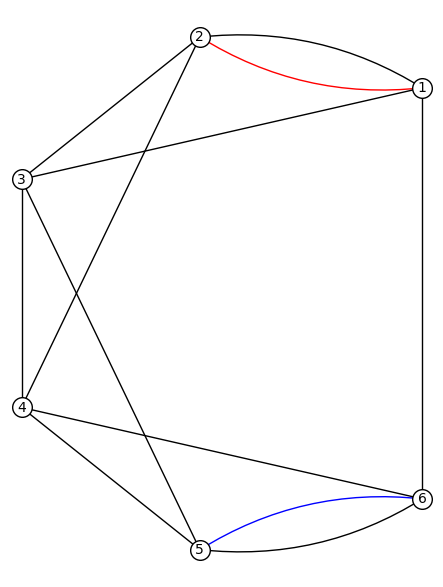

In [5]:
g = graphs.HararyGraph(4, 7)
g.allow_multiple_edges(True)


g.set_edge_label(0, 1, 1)
g.set_edge_label(0, 2, 1)
g.set_edge_label(0, 5, 2)
g.set_edge_label(0, 6, 2)

o = opts(g)
o['layout']= None

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/4_1.png')

_, add, rm = complete_splitting_off(g, 0, 2)

g.set_edge_label(1, 2, 1)
g.set_edge_label(5, 6, 2)

g.add_edges(add)
g.delete_edges(rm)
g.delete_vertex(0)

o = opts(g)
o['layout']= None

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/4_2.png')

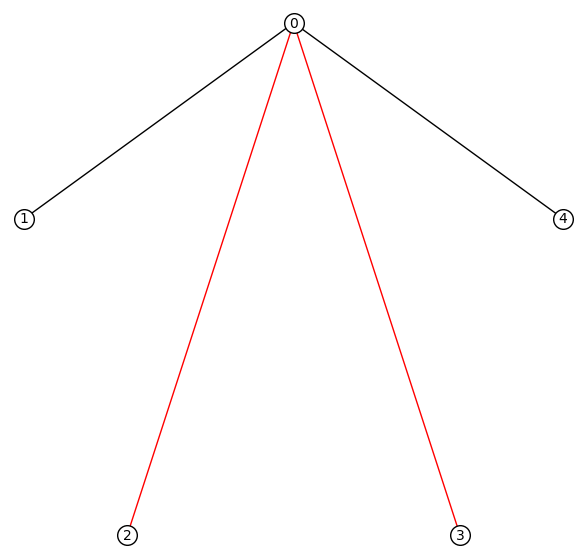

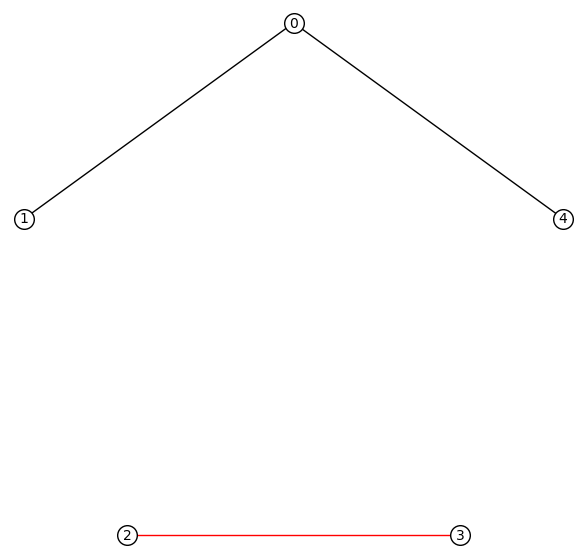

In [6]:
g = Graph({0: [1, 2, 3, 4]})

g.set_edge_label(0, 2, 1)
g.set_edge_label(0, 3, 1)
o = opts(g)

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/5_1.png')
    
g.delete_edges([(0, 2), (0, 3)])
g.add_edge(2, 3, 1)
o = opts(g)

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/5_2.png')

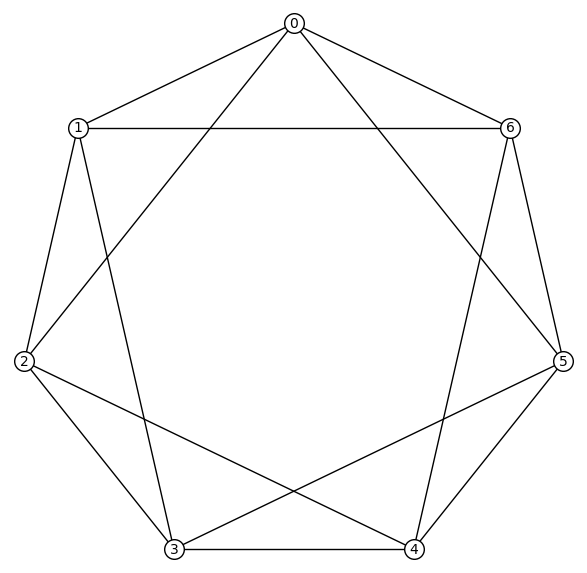

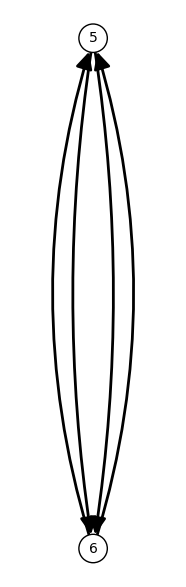

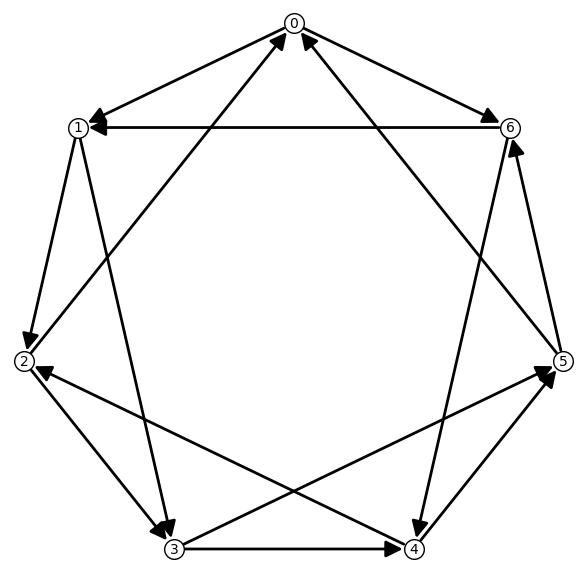

In [7]:
g = graphs.HararyGraph(4, 7)
g.allow_multiple_edges(True)
o = opts(g)

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/6_1.png')

h, ops = lovasz_decomposition(g.copy(), 4)
o = opts(h)

if show:
    # h.show(**o)
    pass
# h.plot(**o).save('../presentation/img/6_2.png')

h.to_directed()

from sage.graphs.digraph import DiGraph
d = DiGraph(data=[h.vertices(), []],
            format='vertices_and_edges',
            multiedges=h.allows_multiple_edges(),
            loops=h.allows_loops(),
            weighted=h.weighted(),
            pos=h.get_pos(),
            name=f'Random 2-connected orientation of {h.name()}')

edges = h.edges()

from random import shuffle
looper = [i for i in range(len(edges))]
shuffle(looper)

for i in looper:
    u, v, label = edges[i][0], edges[i][1], edges[i][2]

    if i % 2:
        d.add_edge(u, v, label)
    else:
        d.add_edge(v, u, label)
        
o = opts(d)
del o['edge_colors']

if show:
    d.show(**o)
d.plot(**o).save('../presentation/img/6_3.png')

for added, removed, v in zip(*ops):
    if v is not None:
        d.add_vertex(v)
    else:
        d.add_edges(removed)
        continue

    for s, e in added:
        edge = (s, e)

        if not d.has_edge(s, e):
            edge = (e, s)

        d.delete_edge(edge)
        d.add_edges([(edge[0], v), (v, edge[1])])
    
    # d.show(**opts(d))
        
if show:
    # d.show(**o)
    pass

ori = orientation(g, 2)
o = opts(ori)

if show:
    ori.show(**o)
ori.plot(**o).save('../presentation/img/6_4.png')

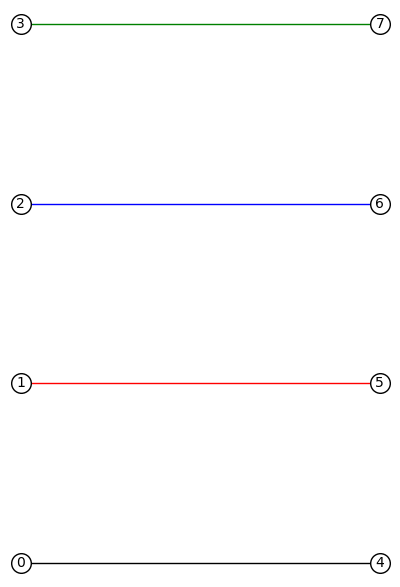

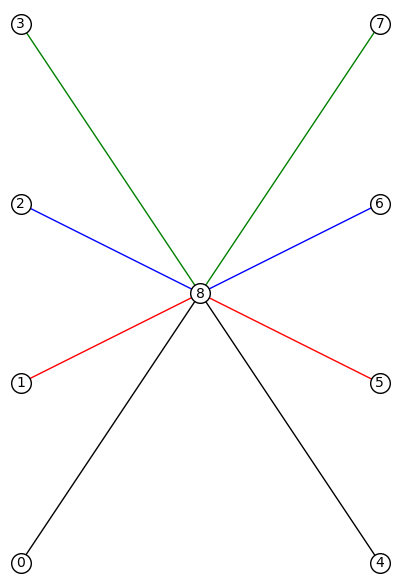

In [8]:
g = Graph({
    0: [4],
    1: [5],
    2: [6],
    3: [7],
})

for i, (u, v, _) in enumerate(g.edges()):
    g.set_edge_label(u, v, i)

pos = {
    0: [0, 0],
    1: [0, 1],
    2: [0, 2],
    3: [0, 3],
    4: [2, 0],
    5: [2, 1],
    6: [2, 2],
    7: [2, 3],
}

o = opts(g)
o['layout'] = None
o['pos'] = pos

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/7_1.png')
    
x = 8
g.add_vertex(name=x)
pos[x] = [1, 1.5]
    
for (i, (u, v, _)) in enumerate(g.edges()):
    g.delete_edge((u, v))
    g.add_edges([(u, x, i), (x, v, i)])

o = opts(g)
o['layout'] = None
o['pos'] = pos

if show:
    g.show(**o)
g.plot(**o).save('../presentation/img/7_2.png')